# 4. 모델 훈련

## 4.1 선형 회귀
<img src='https://miro.medium.com/max/1920/1*GSAcN9G7stUJQbuOhu0HEg.png' width=50%>

선형 회귀를 훈련시키는 방법
- 직접 공식을 사용하여 파라미터 구하기
- 경사하강법(GD)을 사용하여 반복적인 최적화 방식으로 파라미터를 조금씩 바꾸면서 비용 최소화

### 4.1.1 정규방정식
공식을 테스트하기 위해 선형처럼 보이는 데이터 생성

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

`np.linalg` 넘파이 선형대수 모듈  
`inv()` 역행렬  
`dot()` 행렬곱

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

#정규방정식으로 계산한 값 확인
theta_best

array([[3.83135638],
       [3.03817169]])

In [3]:
# 예측
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #모든 샘플에 x0 = 1 추가

y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.83135638],
       [9.90769976]])

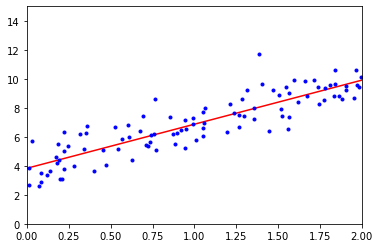

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

### 사이킷런에서의 선형 회귀 수행
`intercept` 절편  
`coef` 회귀계수

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.83135638]), array([[3.03817169]]))

In [6]:
lin_reg.predict(X_new)

array([[3.83135638],
       [9.90769976]])

LinearRegression 클래스는 `scipy.linalg.lstsq()` 함수를 기반으로 하기 때문에 이를 직접 호출할 수 있음  
∂ = X+ y  
*X+은 X의 유사역행렬

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best

array([[3.83135638],
       [3.03817169]])

`np.linalg.pinv()` 유사역행렬 계산  
유사역행렬은 특잇값 분해(SVD)라 부르는 표준 <u>행렬 분해 기법</u>을 사용하여 계산됨

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[3.83135638],
       [3.03817169]])

정규방정식은 (n+1)x(n+1) 크기의 X'X 역행렬을 계산함  
그러나 특성 수가 늘어나면 매우 느려진다!

## 4.2 경사 하강법(Gradient descent)
특성, 훈련 샘플이 매우 많아 메모리에 담을 수 없을 때 사용하며, 비용 함수를 최소화하기 위해 반복하여 파라미터를 조정함

<img src='http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png' width=50%>

- 임의의 값에서 그레디언트가 감소하는 방향으로 진행(0이 되도록)
- 학습 스텝 크기(학습률, learning rate)은 비용 함수의 기울기에 비례

<img src = 'https://www.researchgate.net/profile/Md-Saiful-Islam-15/publication/338621083/figure/fig4/AS:847811214069760@1579145353037/Gradient-Descent-Stuck-at-Local-Minima-18.ppm' width=50%>

- 그러나 무작위 초기화 때문에 전역 최솟값이 아닌 지역 최솟값에 도달하여 멈출 수도 있음
- 선형 회귀는 볼록 함수이기 때문에 지역 최솟값이 없고 하나의 전역 최솟값만 가지고 있음

### 경사하강법을 사용할 땐 모든 특성이 같은 스케일로 만들어야 함! 그렇지 않으면 수렴에 오랜 시간이 걸림!!

### 4.2.1 배치 경사 하강법
경사 하강법을 구하기 위해서는 **세타가 변경될 때 비용 함수가 얼마나 바뀌는지 계산**해야 함(=편도함수)

해당 알고리즘 구현

In [9]:
eta = 0.1 #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) #무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
    
theta

array([[3.83135638],
       [3.03817169]])

적절한 학습률을 찾기 위해서는 *그리드 탐색*을 사용하지만 오래 걸리는 모델을 막기 위해 <u>반복 횟수를 제한함</u>  
반복 횟수를 크게 지정하고, 그래디언트 벡터가 아주 작아지면(허용오차보다 작아짐) 경사하강법이 최솟값에 도달한 것으로 보고 알고리즘 중지

### 4.2.2 확률적 경사 하강법
- 매 스텝에서 **한 개의 샘플을 무작위로 선택**하고 하나의 샘플에 대한 그레디언트를 계산(배치 경사는 매 스텝에서 전체 훈련 세트를 사용) 
- 무작위라 배치  경사 하강법보다 불안정하지만 비용 함수가 불규칙할 때 전역 최솟값을 찾을 가능성이 높음
- 학습률을 점진적으로 감소시키는 것으로 딜레마를 해결할 수 있음

`학습 스케쥴` 반복에서 학습률 결정  
학습 스케쥴을ㅇ 사용한 확률적 경사 하강법의 구현

In [11]:
n_epochs = 50
t0, t1 = 5, 50 #학습 스케줄 파라미터

def learning_schedult(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1) #무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedult(epoch*m+i)
        theta = theta - eta * gradients
        
# m: 반복(epoch)

In [12]:
theta

array([[3.82377762],
       [3.01868682]])

**? 훈련 샘플 섞기**  
확률적 경사 하강법을 사용할 때 훈련 샘플이 IID(independent and identically distributed)를 만족해야 전역 최적점을 향해 진행한다 볼 수 있음.  
이를 위해 훈련 세트를 섞음(입력 특성과 레이블을 동일하게 섞어야 함)  
만약 레이블 순서대로 정렬된 샘플을 그대로 사용한다면 한 레이블에 최적화될 것

`SGDRegressor` SGD 선형회귀를 사용하기 위해 제곱 오차 비용 함수를 최적화하는 클래스 사용  
- max_iter: epoch
- tol: 한 에포크에서 파라미터보다 적게 손실이 줄어들 때까지 실행
- eta: 학습률
- penalty: 규제

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.81883798]), array([3.02180601]))

### 4.2.3 미니배치 경사 하강법
- `미니배치`라는 임의의 sample set에 대해 그레이디언트를 계산
- 행렬 연산에 최적화된 하드웨어, GPU를 사용하여 얻는 성능 향상이 장점
- 미니배치를 크게 하면 SGD보다 덜 불규칙하게 움직임
- 지역 최솟값에서 빠져나오기는 **더** 힘들 수 있음

## 4.3 다항 회귀
비선형 데이터에 사용

2차방정식으로 비선형 데이터 생성하기

In [15]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X+2 + np.random.randn(m, 1)

`PolynomialFeatures`를 사용해 훈련 데이터 변환  
degree: 차수  
주어진 차수까지 특성 간의 모든 교차항을 추가

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.51850669])

In [17]:
X_poly[0]

array([2.51850669, 6.34287595])

X_poly는 원래 특성 X와 제곱을 포함

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, X)
lin_reg.intercept_, lin_reg.coef_

(array([2.77555756e-17]), array([[1.00000000e+00, 1.82395305e-17]]))

## 4.4 학습 곡선
- 모델의 과적합을 판별하는 방법 중 하나(다른 하나는 교차 검증)
- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(반복)의 함수로 나타냄

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

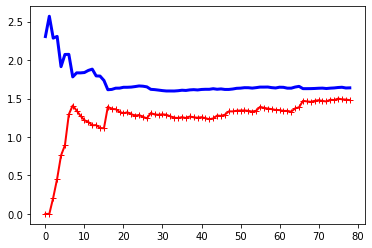

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

과소적합된 모델의 전형적인 모습. 두 곡선이 수평한 구간을 만들고 높은 오차에서 가까이 근접  
cf) 모델이 훈련 데이터에 과소적합이라면 훈련 샘플을 더 추가해도 효과가 없음! 더 복잡한 모델 사용/더 나은 특성 선택으로 해결

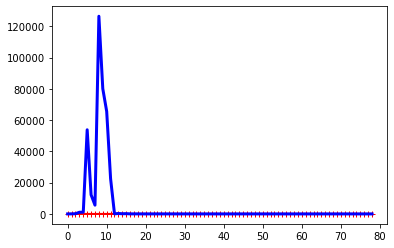

In [26]:
#10차 다항회귀모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음 
- 두 곡선 사이의 공간은 과대적합 모델의 특징

**편향-분산 트레이드오프**
- 편향
    - 잘못된 가정(ex. 데이터가 2년차인데 3년차로 가정)으로 일어남. 과소적합되기 쉬움

- 분산
    - 작은 변동에 모델이 과도하게 민감하기 때문에 일어남. 과대적합되기 쉬움
    
- 줄일 수 없는 오차
    - 데이터 자체에 있는 잡음으로 발생, 잡음 제거로 오차를 줄일 수 있음
    
    
모델의 복잡도가 커지면 분산이 늘어나고 편향이 줄어들며, 복잡도가 줄어들면 이와 반대!

## 4.5 규제가 있는 선형 모델
- 규제: 과대적합을 감소시키는 방법  
- 다항 회귀의 경우 다항식의 차수를 감소시킴
- 선형 회귀 모델에서는 보통 모델의 가중치를 제한함

### 4.5.1 릿지 회귀
- 규제항은 학습 알고리즘을 데이터에 맞추는 것 뿐 아니라 모델의 가중치가 가능한 작게 유지되도록 노력
- 모델 훈련이 끝나면 성능을 규제 없는 성능 지표로 평가
- α: 모델을 얼마나 규제할지, α가 커질수록 수평선이 됨

정규방정식을 사용한 사이킷런 릿지 회귀 적용 예시

In [28]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=-1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.81333382]])

확률적 경사 하강법을 사용했을 때  
`penalty = 'l2'` 비용 함수에 규제항 추가(=릿지회귀)

In [30]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.79475725])

### 4.5.2 라쏘 회귀
- 덜 중요한 특성의 가중치를 제거
- 자동으로 특성 선택을 하고 희소 모델(sparse model)을 만든다

In [31]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.76333499])

Lasso 대신 SGDRegressor(`penalty='l1'`)을 사용할 수도 있음

### 4.5.3 엘라스틱넷
- 릿지와 라쏘의 절충 모델
- 혼합 정도는 혼합 비율 r을 사용해 조절
    - r = 0: Ridge
    - r = 1: Lasso
    
- 릿지가 기본이 되지만 쓰이는 특성이 몇 개 뿐이라면 라쏘나 엘라스틱넷이 낫다!

In [32]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.76584464])

### 4.5.4 조기 종료
규제의 다른 방식은 에러가 최솟값에 도달하면 훈련을 중지하는 것(조기종료)

`warm_start = True` fit()이 호출될 때 처음부터 시작하지 않고 이전 모델 파라미터에서 훈련을 이어함

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias = False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = np.infty, warm_start = True, penalty = None, learning_rage = 'constant', eta0 = 0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    if val_error<minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

In [37]:
# 노트북
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

NameError: name 'X_train' is not defined

## 4.6 로지스틱 회귀
- 샘플이 특정 클래스에 속할 확률을 추정할 때 널리 쓰임
- 확률이 50%가 넘으면 해당 클래스에 속한다고 예측(이진 분류기)

### 4.6.1 확률 추정
- 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 `로지스틱logistic`을 출력
- 로지스틱은 0과 1 사이의 값을 출력하는 `시그모이드 함수`

### 4.6.2 훈련과 비용 함수
- 양성 샘플(y=1)에 대해선 높은 확률을 추정하고 음성 샘플(y=0)에선 낮은 확률을 추정하는 모델의 파라미터 벡터 theta 찾기
- 맞게 측정할수록 비용이 0에 가까워짐

### 4.6.3 결정 경계
[iris data]  
3종류의 붓꽃, 꽃잎/
꽃받침의 너비와 길이

꽃잎(petal)의 너비를 기반으로 Versicolor 종을 감지하는 분류기

In [39]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [40]:
X = iris['data'][:, 3:] #꽃잎 너비
y = (iris['target'] == 2).astype(np.int) #맞으면 1, 아니면 0

In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

꽃잎 너비가 0~3cm인 꽃에 대해 추정 확률 계산

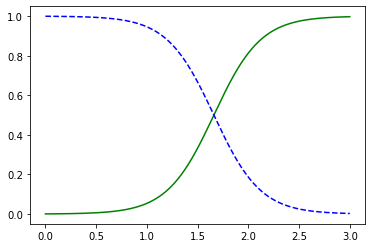

In [49]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris virginica')

In [50]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

로지스틱 회귀의 규제 하이퍼 파라미터는 alpha가 아니라 그의 역수인 C  
C가 높을수록 규제가 줄어든다

### 4.6.4 소프트맥스 회귀
- 직접 다중 클래스를 지원하도록 일반화 될 수 있음! 이를 `소프트맥스 회귀` 또는 `다항 로지스틱 회귀`라고 함
- sample이 주어지면 모델이 클래스 k에 대한 점수 s(x)를 계산하고, s(x)에 소프트맥스 함수를 적용해 클래스의 확률을 추정
- 한 번에 하나의 클래스만 예측(다중 클래스, not 다중 출력)


`argmax` 함수를 최대화하는 변수의 값 반환 

- Logistic Regression은 클래스가 둘 이상일 때 일대다(OvA) 방식을 사용하지만 multi_class 매개변수를 `multinomial`로 바꾸면 소프트맥스 회귀 사용 가능  
- 이를 사용하려면 solver 매개변수에 `lbfgs`와 같이 지원하는 알고리즘 지정  
- 기본적으로 C를 사용해 조절할 수 있는 l2 규제가 적용

In [51]:
X = iris['data'][:, (2,3)] #꽃잎 길이, 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [52]:
softmax_reg.predict([[5, 2]])

array([2])

In [54]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])